In [1]:
from pyrpl import Pyrpl
HOSTNAME = "132.72.14.12"  # rp-f0b1b0
#HOSTNAME = "132.72.13.15"  # rp-f09ded
p = Pyrpl(hostname = HOSTNAME, config="rp-f0b1b0.yml")

c:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\paramiko\transport.py:32: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography.hazmat.backends import default_backend
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:Select

Rough time to read one FPGA register:  919.0525611241659 us


Text(0, 0.5, 'V[?]')

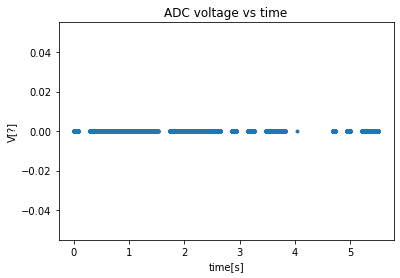

In [6]:
r = p.rp
#see how the adc reading fluctuates over time
import time
from matplotlib import pyplot as plt
times, data = [],[]
t0 = time.time()
n = 6000
for i in range(n):
    times.append(time.time()-t0)
    data.append(r.scope.voltage_in1)
print("Rough time to read one FPGA register: ", (time.time()-t0)/n*1e6, "us")
%matplotlib inline
plt.plot(times, data, ".")
plt.title("ADC voltage vs time")
plt.xlabel("time[s]")
plt.ylabel("V[?]")

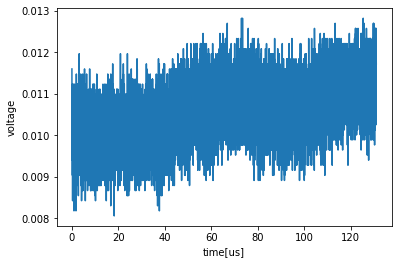

In [4]:
from pyrpl.async_utils import sleep

def callback(res):
    data = res.result()
    plt.plot((s.times*1e6)[:], data[0][:])
    plt.xlabel("time[us]")
    plt.ylabel("voltage")  
      

#my own attempt at reading data from RP
s = r.scope
s.input1 = "in1"
s.trigger_source = "immediately"
s.decimation = 1  

res = s.curve_async()
res.add_done_callback(callback)
# print(type(res))
sleep(1)